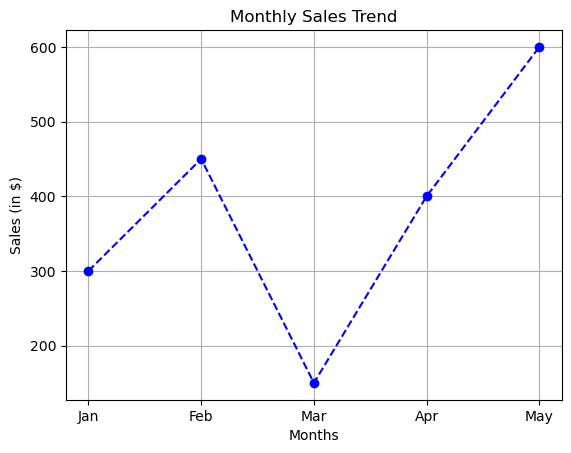

In [3]:
import matplotlib.pyplot as plt
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
sales = [300, 450, 150, 400, 600]
plt.plot(months, sales, color='blue', marker='o', linestyle='--')
# Add labels and title
plt.title("Monthly Sales Trend")
plt.xlabel("Months")
plt.ylabel("Sales (in $)")
plt.grid(True)
plt.show()
 

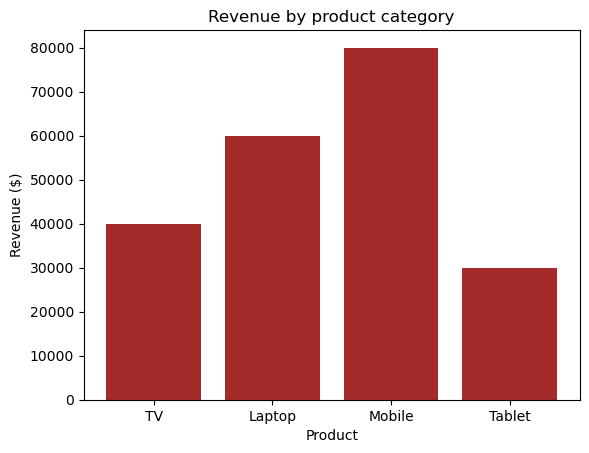

In [7]:
products=['TV','Laptop','Mobile','Tablet']
revenue=[40000,60000,80000,30000]
plt.bar(products,revenue,color='brown')
plt.title("Revenue by product category")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.show()

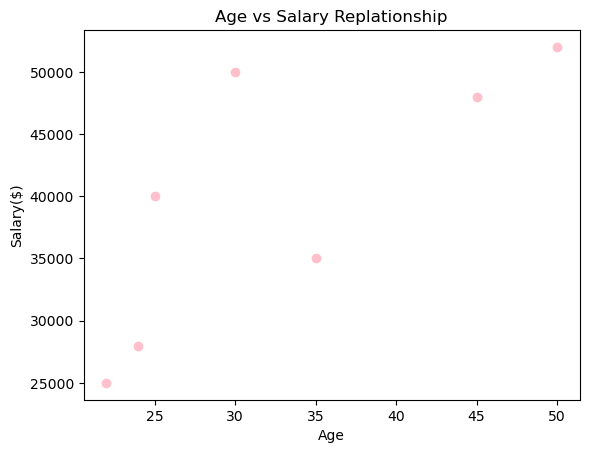

In [9]:
import numpy as np
age=np.array([22,24,25,35,50,45,30])
salary=np.array([25000,28000,40000,35000,52000,48000,50000])
plt.scatter(age,salary,color='pink')
plt.title("Age vs Salary Replationship")
plt.xlabel("Age")
plt.ylabel("Salary($)")
plt.show()

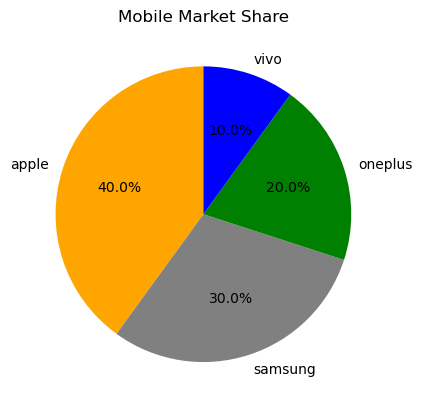

In [17]:
brands=['apple','samsung','oneplus','vivo']
market_share=[40,30,20,10]
colors=['orange','grey','green','blue']
plt.pie(market_share,labels=brands,colors=colors,autopct='%1.1f%%',startangle=90)
plt.title("Mobile Market Share")
plt.show()

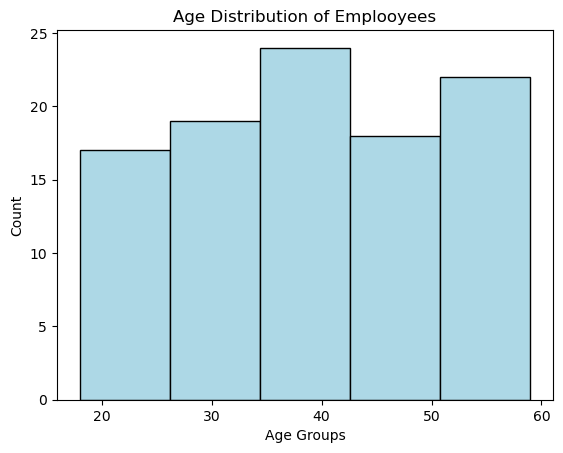

In [21]:
ages=np.random.randint(18,60,100)
plt.hist(ages,bins=5,color='lightblue',edgecolor='black')
plt.title("Age Distribution of Emplooyees")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.show()

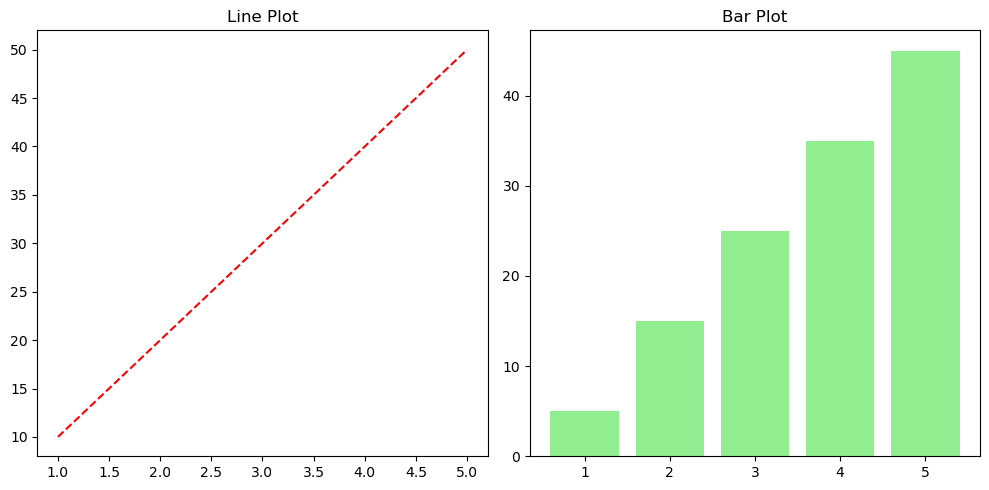

In [27]:
x=[1,2,3,4,5]
y1=[10,20,30,40,50]
y2=[5,15,25,35,45]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x,y1,'r--')
plt.title("Line Plot")
plt.subplot(1,2,2)
plt.bar(x,y2,color='lightgreen')
plt.title("Bar Plot")
plt.tight_layout()
plt.show()

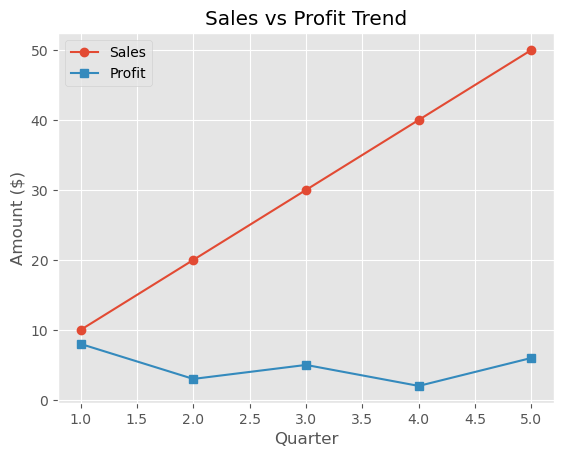

In [31]:
plt.style.use('ggplot')
x=[1,2,3,4,5]
sales=[10,20,30,40,50]
profit=[8,3,5,2,6]
plt.plot(x,sales,label='Sales',marker='o')
plt.plot(x,profit,label='Profit',marker='s')
plt.title("Sales vs Profit Trend")
plt.xlabel("Quarter")
plt.ylabel("Amount ($)")
plt.legend()
plt.savefig("sales_profit_chart.png")
plt.show()

In [37]:
import pandas as pd
df=pd.read_csv(r"C:\coetraining\matplotlib\data.csv")
df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020/12/01,110,130,409.1
1,60,2020/12/02,117,145,479.0
2,60,2020/12/03,103,135,340.0
3,45,2020/12/04,109,175,282.4
4,45,2020/12/05,117,148,406.0


In [39]:
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (32, 5)

Data types:
 Duration      int64
Date         object
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object

Missing values:
 Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64


In [41]:
duplicates = df.duplicated().sum()
df = df.drop_duplicates()

print(f"Number of duplicate rows removed: {duplicates}")
print("New shape:", df.shape)

Number of duplicate rows removed: 1
New shape: (31, 5)


In [43]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
invalid_dates = df['Date'].isna().sum()
df = df.sort_values(by='Date')
print(f"Number of invalid/missing dates: {invalid_dates}")

Number of invalid/missing dates: 1


In [45]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


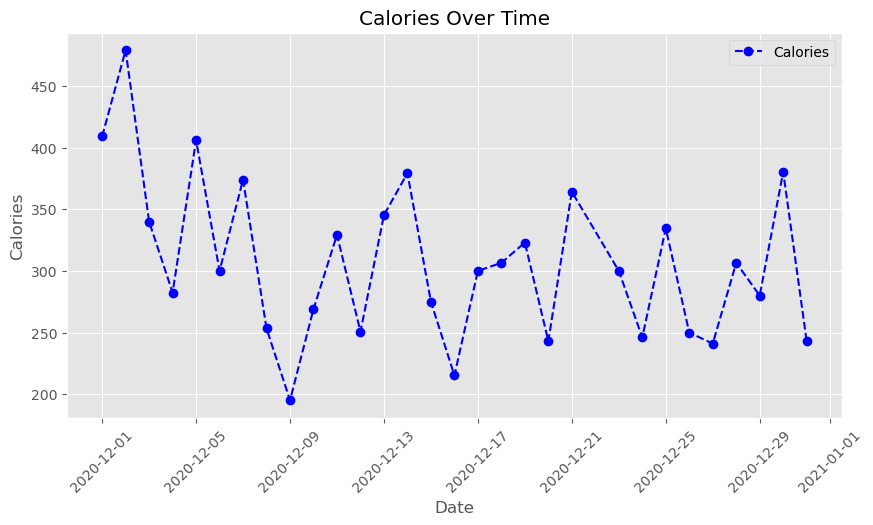

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Calories'], marker='o', linestyle='--', color='b', label='Calories')

plt.title('Calories Over Time')
plt.xlabel('Date')
plt.ylabel('Calories')

plt.grid(True)
plt.xticks(rotation=45)

plt.legend()

plt.savefig('line_calories_over_time.png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\vedap\AppData\Local\Temp\ipykernel_6004\1596149620.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pulse = df.groupby('Duration_Group')['Pulse'].mean().reset_index()


  Duration_Group       Pulse
0           0–20         NaN
1          21–40  109.000000
2          41–60  103.413793
3          61–80         NaN
4         81–100         NaN
5        101–120         NaN


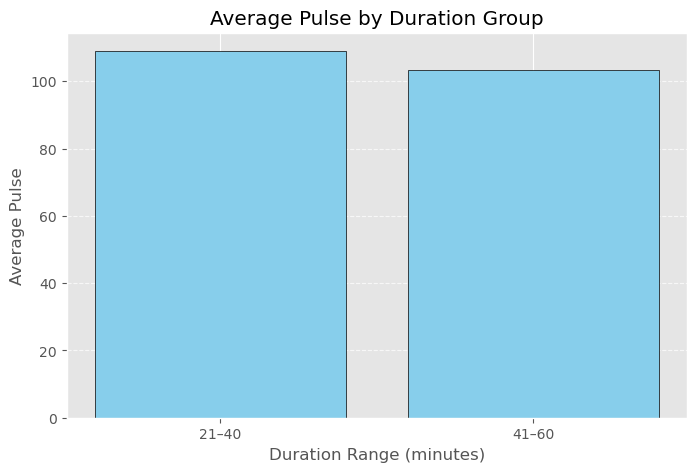

In [57]:
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ['0–20', '21–40', '41–60', '61–80', '81–100', '101–120']


df['Duration_Group'] = pd.cut(df['Duration'], bins=bins, labels=labels, right=True)


avg_pulse = df.groupby('Duration_Group')['Pulse'].mean().reset_index()

print(avg_pulse)


plt.figure(figsize=(8, 5))
plt.bar(avg_pulse['Duration_Group'], avg_pulse['Pulse'], color='skyblue', edgecolor='black')


plt.title('Average Pulse by Duration Group')
plt.xlabel('Duration Range (minutes)')
plt.ylabel('Average Pulse')

plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.savefig('bar_avg_pulse_by_duration.png', dpi=300, bbox_inches='tight')

plt.show()


Pearson correlation coefficient: -0.12


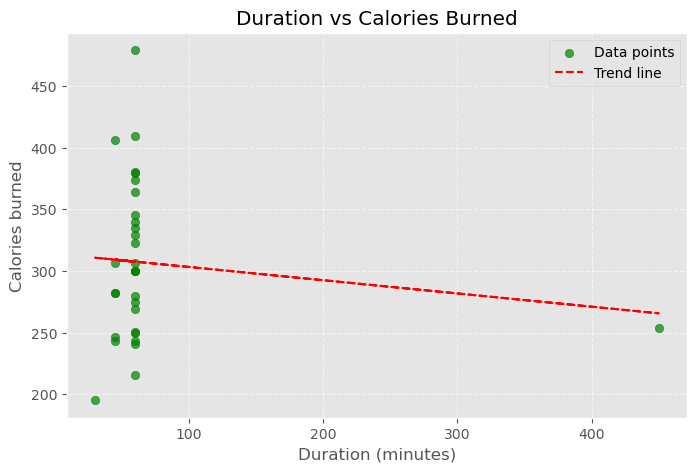

In [61]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['Duration'], df['Calories'])
print(f"Pearson correlation coefficient: {corr:.2f}")
plt.figure(figsize=(8, 5))
plt.scatter(df['Duration'], df['Calories'],color='green', alpha=0.7, label='Data points')
m, b = np.polyfit(df['Duration'], df['Calories'], 1)
plt.plot(df['Duration'], m*df['Duration'] + b, color='red', linestyle='--', label='Trend line')

plt.title('Duration vs Calories Burned')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories burned')

plt.grid(True,linestyle='--', alpha=0.6)

plt.legend()

plt.savefig('scatter_duration_vs_calories.png', dpi=300, bbox_inches='tight')
plt.show()

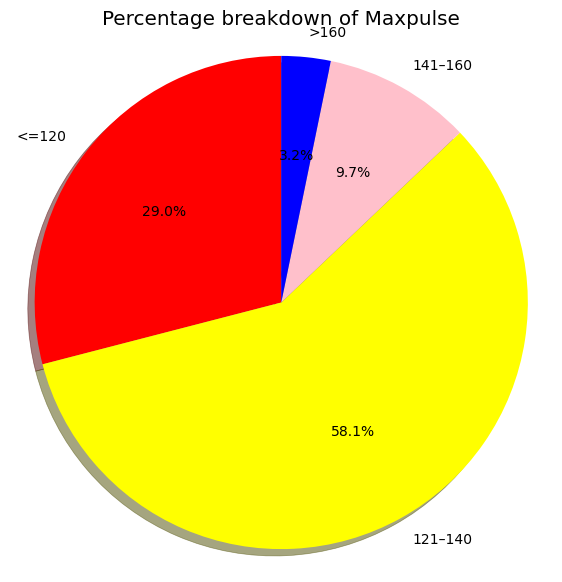

In [73]:
bins = [0, 120, 140, 160, df['Maxpulse'].max()]
labels = ['<=120', '121–140', '141–160', '>160']
df['Maxpulse_Range'] = pd.cut(df['Maxpulse'], bins=bins, labels=labels, right=True)
maxpulse_counts = df['Maxpulse_Range'].value_counts().sort_index()
plt.figure(figsize=(7, 7))
colors=['red','yellow','pink','blue']
plt.pie(maxpulse_counts,
        labels=maxpulse_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        shadow=True)

plt.title("Percentage breakdown of Maxpulse")
plt.axis('equal')
plt.savefig("pie_maxpulse_ranges.png",dpi=300,bbox_inches='tight')
plt.show()

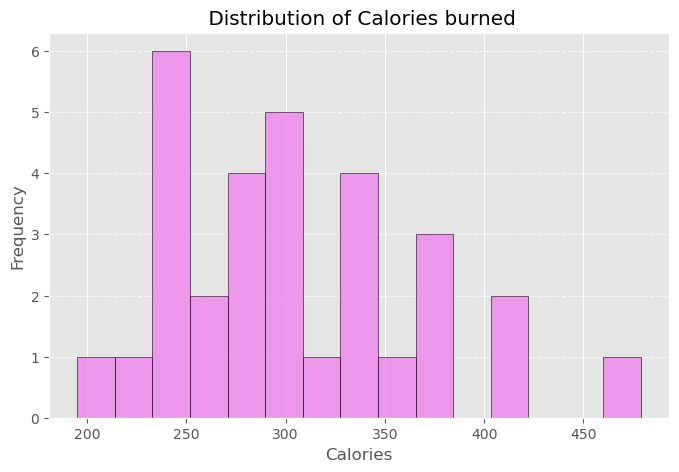

In [75]:
plt.figure(figsize=(8, 5))
plt.hist(df['Calories'], bins=15, color='violet', edgecolor='black', alpha=0.8)
plt.title(" Distribution of Calories burned")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('hist_calories.png',dpi=300,bbox_inches='tight')
plt.show()

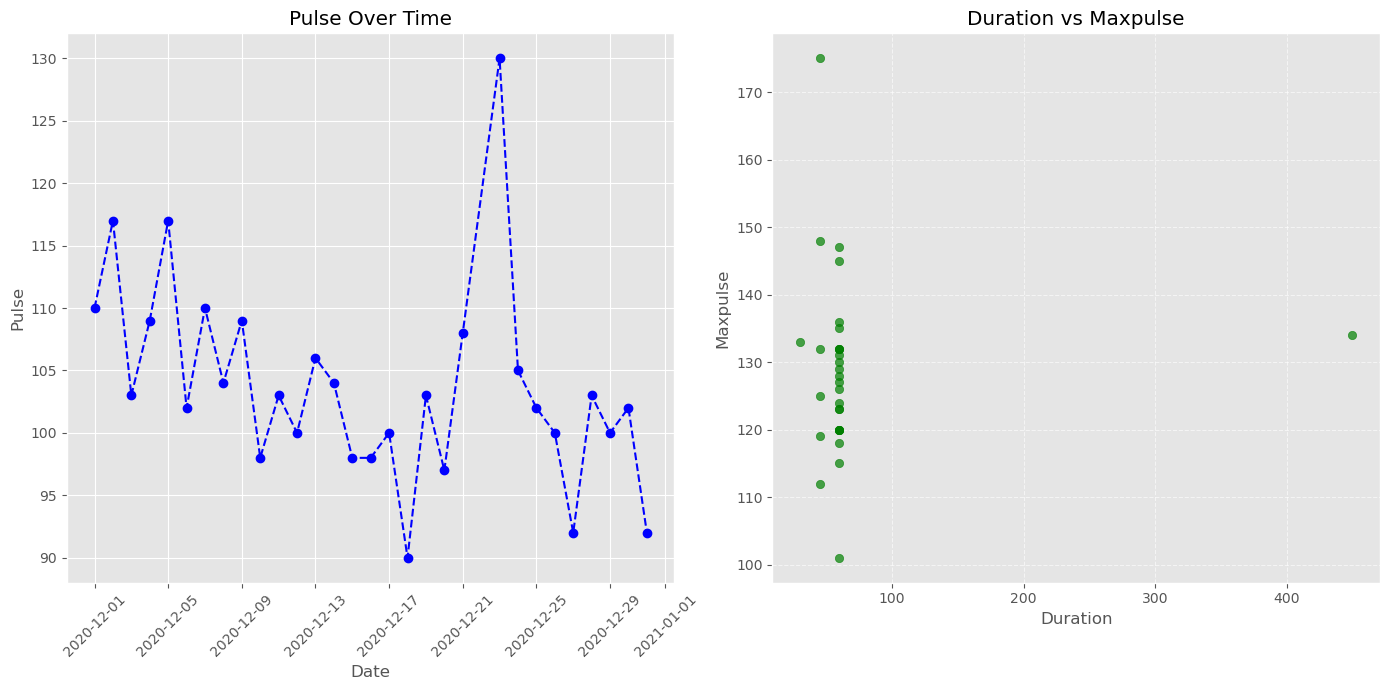

In [83]:
plt.figure(figsize=(14, 7))

# Left subplot: Line plot of Pulse over Date
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(df['Date'], df['Pulse'], marker='o', linestyle='--', color='blue')
plt.title('Pulse Over Time')
plt.xlabel('Date')
plt.ylabel('Pulse')
plt.grid(True)
plt.xticks(rotation=45)

# Right subplot: Scatter plot of Duration vs Maxpulse
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.scatter(df['Duration'], df['Maxpulse'], color='green', alpha=0.7)
plt.title('Duration vs Maxpulse')
plt.xlabel('Duration')
plt.ylabel('Maxpulse')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('subplots_pulse_duration_maxpulse.png', dpi=300, bbox_inches='tight')
plt.show()

In [91]:
df1=pd.read_csv(r"C:\coetraining\matplotlib\tip(in).csv")
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [93]:
print("Shape of dataset:", df1.shape)
print("\nData types:\n", df1.dtypes)
print("\nMissing values:\n", df1.isnull().sum())

Shape of dataset: (244, 7)

Data types:
 total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

Missing values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


Missing values after handling:
 Duration          0
Date              1
Pulse             0
Maxpulse          0
Calories          0
Duration_Group    1
Maxpulse_Range    0
dtype: int64


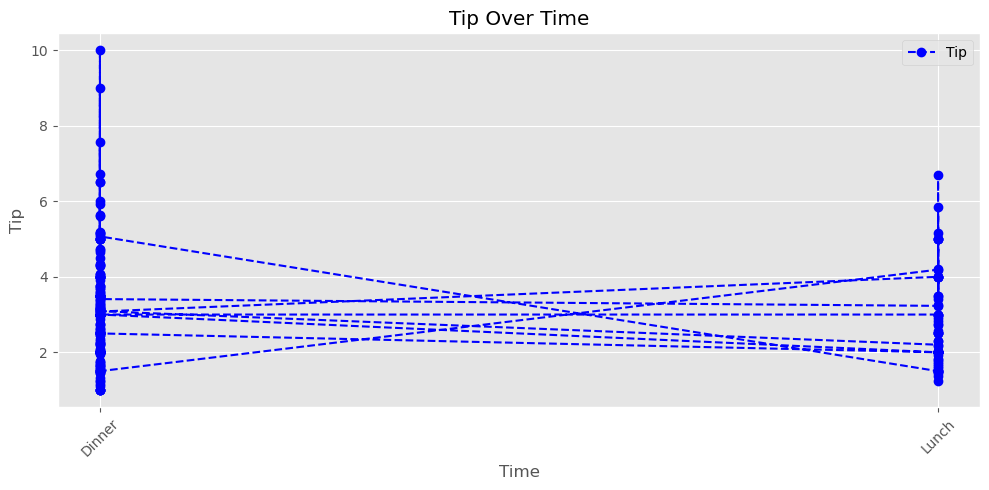

In [101]:
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
df1[numeric_cols] = df1[numeric_cols].fillna(df1[numeric_cols].mean())
print("Missing values after handling:\n", df.isnull().sum())

plt.figure(figsize=(10, 5))

plt.plot(df1['time'], df1['tip'], marker='o', linestyle='--', color='b', label='Tip')

plt.title('Tip Over Time')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
in above plot we can see:
How does a numerical variable (e.g., Sales) change over time or index? 
Are there visible upward or downward trends? 
Are there any noticeable spikes, dips, or seasonality? 

day
Sat     1778.40
Sun     1627.16
Thur    1096.33
Fri      325.88
Name: total_bill, dtype: float64
Day contributing most: Sat ($1778.40)
Day contributing least: Fri ($325.88)
Gap between highest and lowest: $1452.52


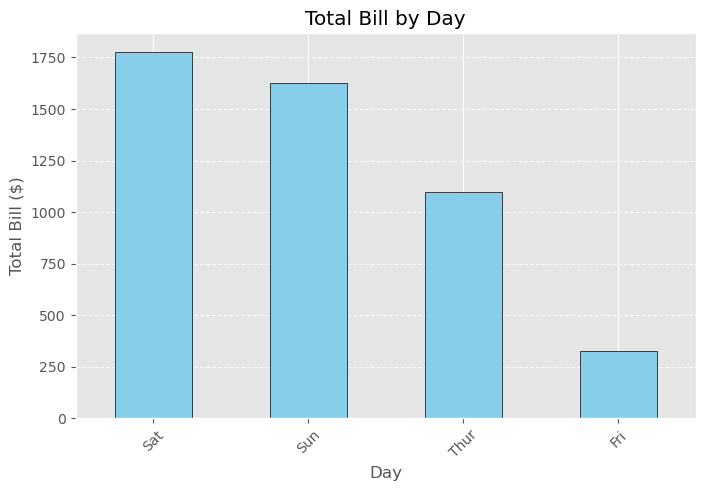

In [109]:
day_totals = df1.groupby('day')['total_bill'].sum().sort_values(ascending=False)
print(day_totals)
top_day = day_totals.idxmax()
top_value = day_totals.max()
bottom_day = day_totals.idxmin()
bottom_value = day_totals.min()
gap = top_value - bottom_value

print(f"Day contributing most: {top_day} (${top_value:.2f})")
print(f"Day contributing least: {bottom_day} (${bottom_value:.2f})")
print(f"Gap between highest and lowest: ${gap:.2f}")

plt.figure(figsize=(8,5))
day_totals.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Bill by Day')
plt.ylabel('Total Bill ($)')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
in above plot we can see:
Which Day contributes most to the total bill? 
Which day have lower contributions? 
How big is the gap between days? 

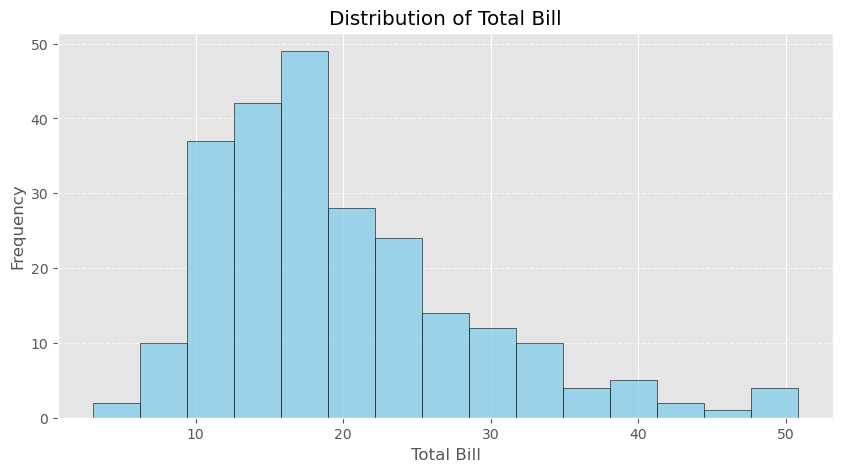

In [113]:
plt.figure(figsize=(10,5))
plt.hist(df1['total_bill'], bins=15, color='skyblue', edgecolor='black', alpha=0.8)

plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
in above plot we can see:
How are values in a numerical column of total_bill distributed? 
Are they concentrated around certain ranges or spread out evenly? 
Are there extreme values? 

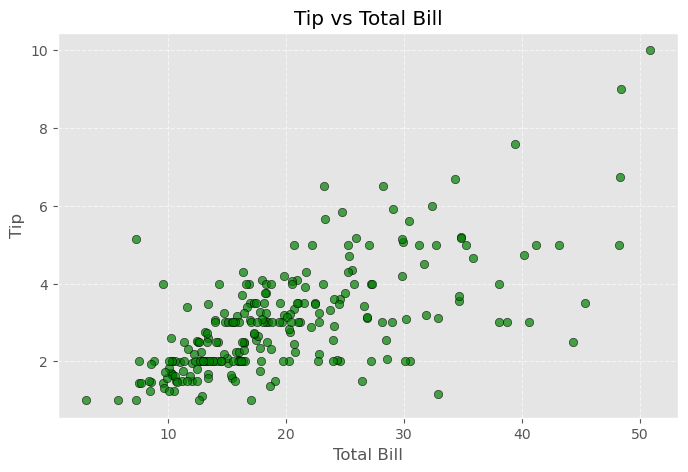

In [115]:
plt.figure(figsize=(8,5))
plt.scatter(df1['total_bill'], df1['tip'], color='green', alpha=0.7, edgecolor='black')

plt.title('Tip vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
in above plot we can see:
How does one numerical variable relate to another like tip and total_bill? 
Is there any visible correlation? 
Are there outliers? 

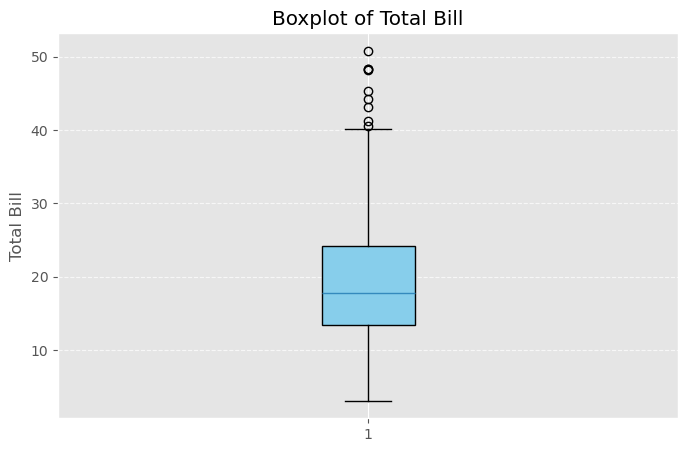

In [117]:
plt.figure(figsize=(8,5))
plt.boxplot(df1['total_bill'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot of Total Bill')
plt.ylabel('Total Bill')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
in above plot we can see:
How spread out are values in a numerical column total_bill? 
Are there any outliers? 
How does this spread differ across categories? 

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


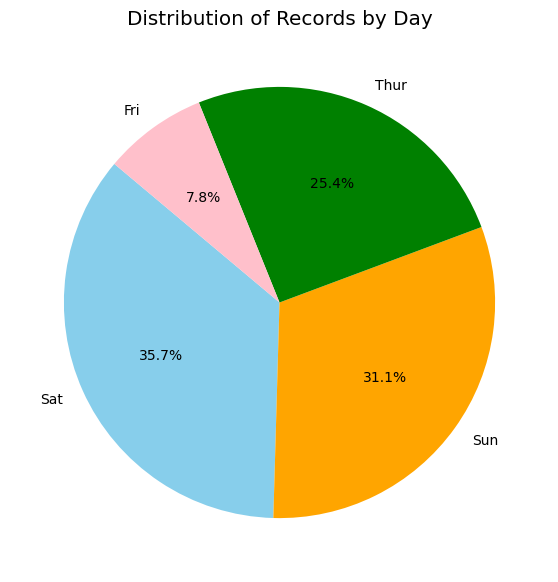

In [119]:
day_counts = df1['day'].value_counts()
print(day_counts)
plt.figure(figsize=(7,7))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'pink'])
plt.title('Distribution of Records by Day')
plt.show()


In [ ]:
in above plot we can see:
How is the dataset divided among different days? 
Which day has the largest share? 
Is the distribution balanced or skewed? 

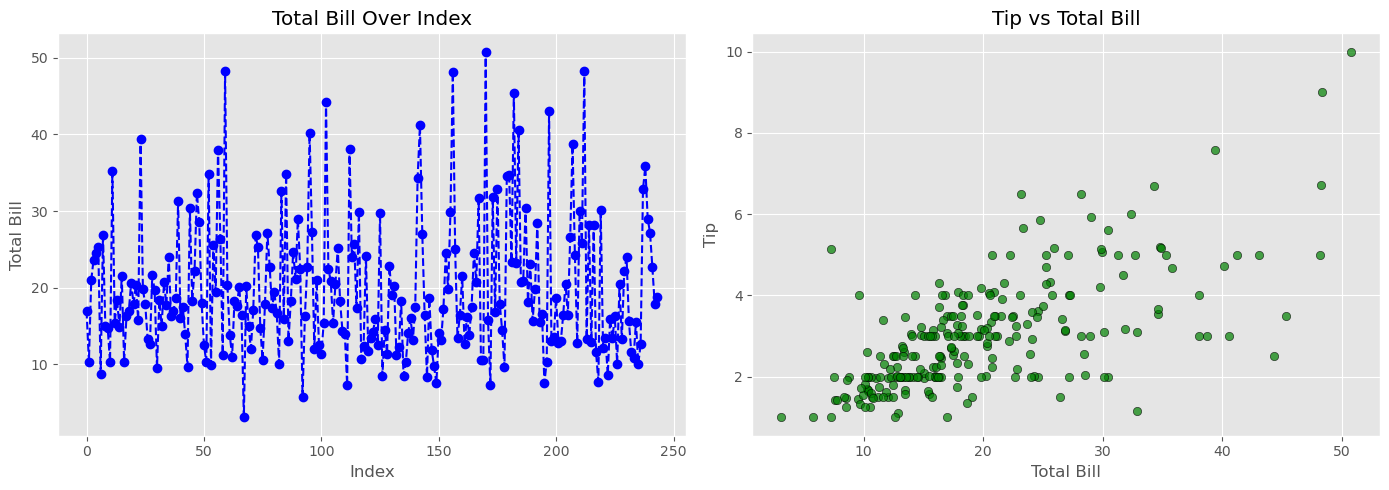

In [121]:
plt.figure(figsize=(14,5))

# 1️⃣ Left plot: Line plot of total_bill over index
plt.subplot(1, 2, 1)  # 1 row, 2 cols, 1st plot
plt.plot(df1.index, df1['total_bill'], marker='o', linestyle='--', color='blue')
plt.title('Total Bill Over Index')
plt.xlabel('Index')
plt.ylabel('Total Bill')
plt.grid(True)

# 2️⃣ Right plot: Scatter plot of total_bill vs tip
plt.subplot(1, 2, 2)  # 1 row, 2 cols, 2nd plot
plt.scatter(df1['total_bill'], df1['tip'], color='green', alpha=0.7, edgecolor='black')
plt.title('Tip vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
in above plot we can see:
How do multiple insights look side by side? 
Can we spot patterns when trend, distribution, and relationships are combined visually? 
Which plot gives the clearest story? 

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
 
sns.set_theme(style='whitegrid')
 
# Load example datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
 
print('Datasets loaded: tips (rows={}), iris (rows={})'.format(len(tips), len(iris)))
 
tips.head()

Datasets loaded: tips (rows=244), iris (rows=150)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


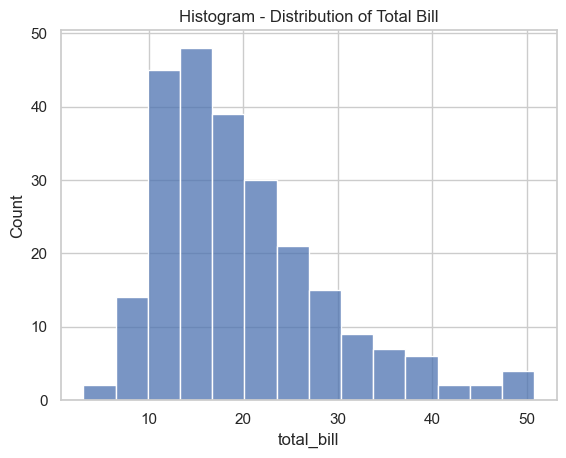

In [127]:
sns.histplot(tips['total_bill'], kde=False)
plt.title('Histogram - Distribution of Total Bill')
plt.show()

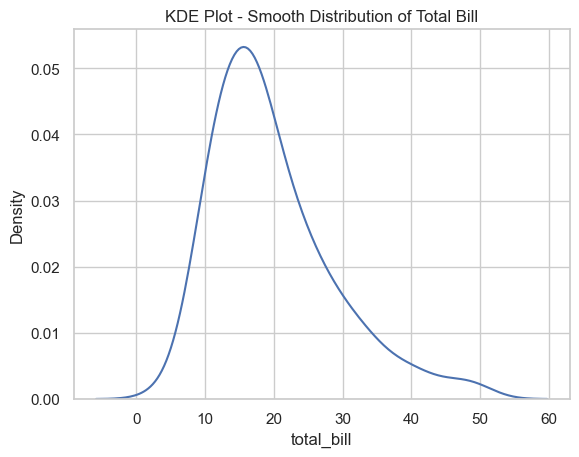

In [129]:
# KDE Plot
sns.kdeplot(tips['total_bill'])
plt.title('KDE Plot - Smooth Distribution of Total Bill')
plt.show()

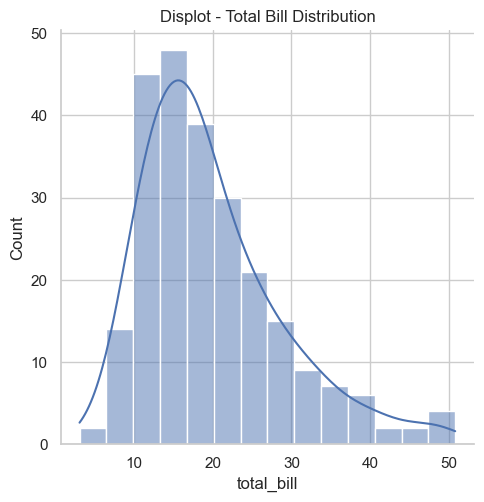

In [131]:
# Displot (Histogram + KDE)
sns.displot(tips['total_bill'], kde=True)
plt.title('Displot - Total Bill Distribution')
plt.show()

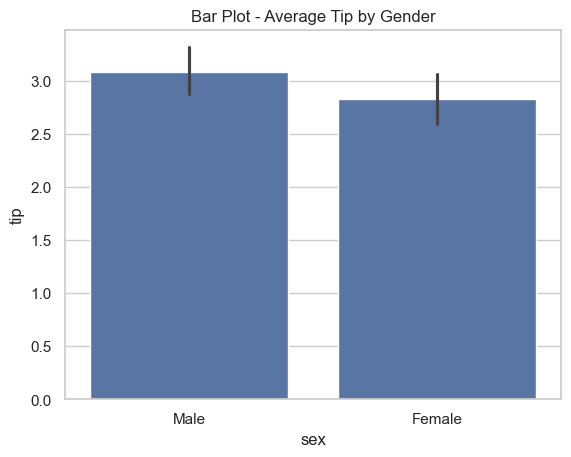

In [133]:
# Bar Plot - Average Tip by Gender
sns.barplot(x='sex', y='tip', data=tips)
plt.title('Bar Plot - Average Tip by Gender')
plt.show()

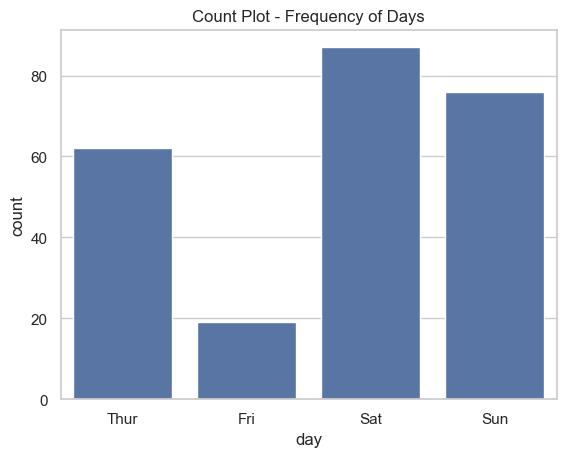

In [135]:
# Count Plot - Frequency of Days
sns.countplot(x='day', data=tips)
plt.title('Count Plot - Frequency of Days')
plt.show()

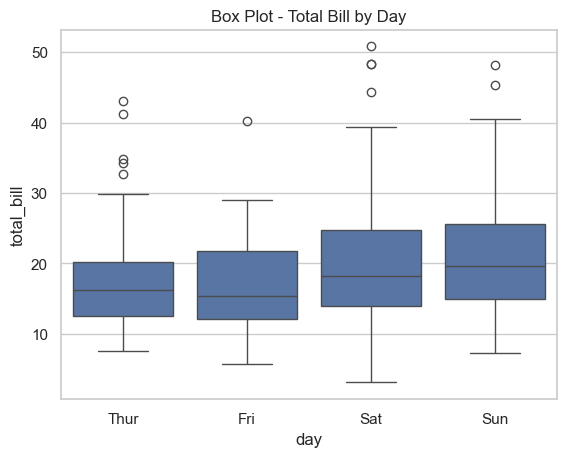

In [137]:
# Box Plot - Total Bill by Day
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Box Plot - Total Bill by Day')
plt.show()

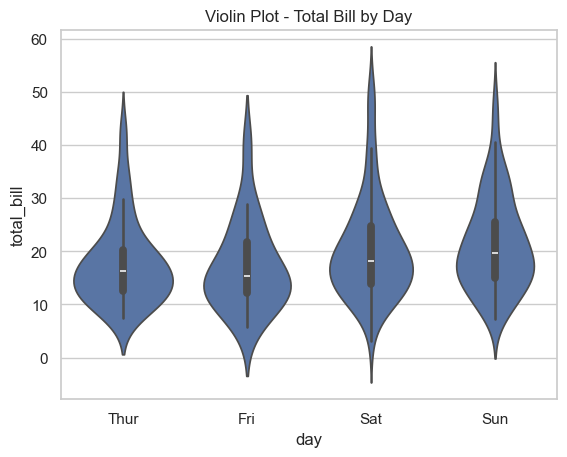

In [139]:
# Violin Plot - Distribution + Summary
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title('Violin Plot - Total Bill by Day')
plt.show()

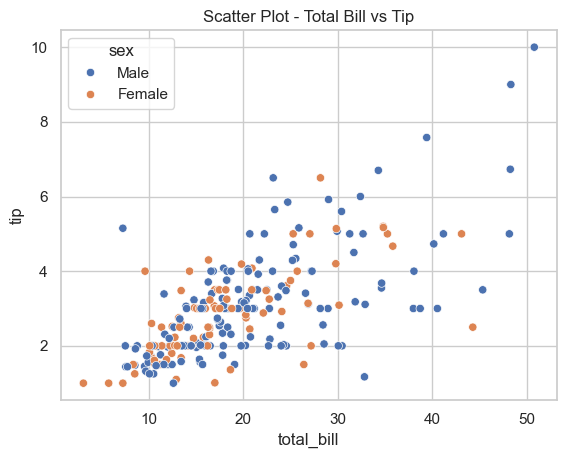

In [141]:
# Scatter Plot - Total Bill vs Tip
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')
plt.title('Scatter Plot - Total Bill vs Tip')
plt.show()

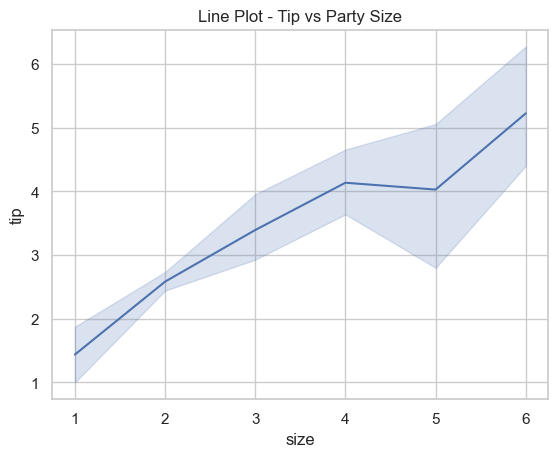

In [143]:
# Line Plot - Tip vs Party Size (useful for trend-like visuals)
sns.lineplot(x='size', y='tip', data=tips)
plt.title('Line Plot - Tip vs Party Size')
plt.show()

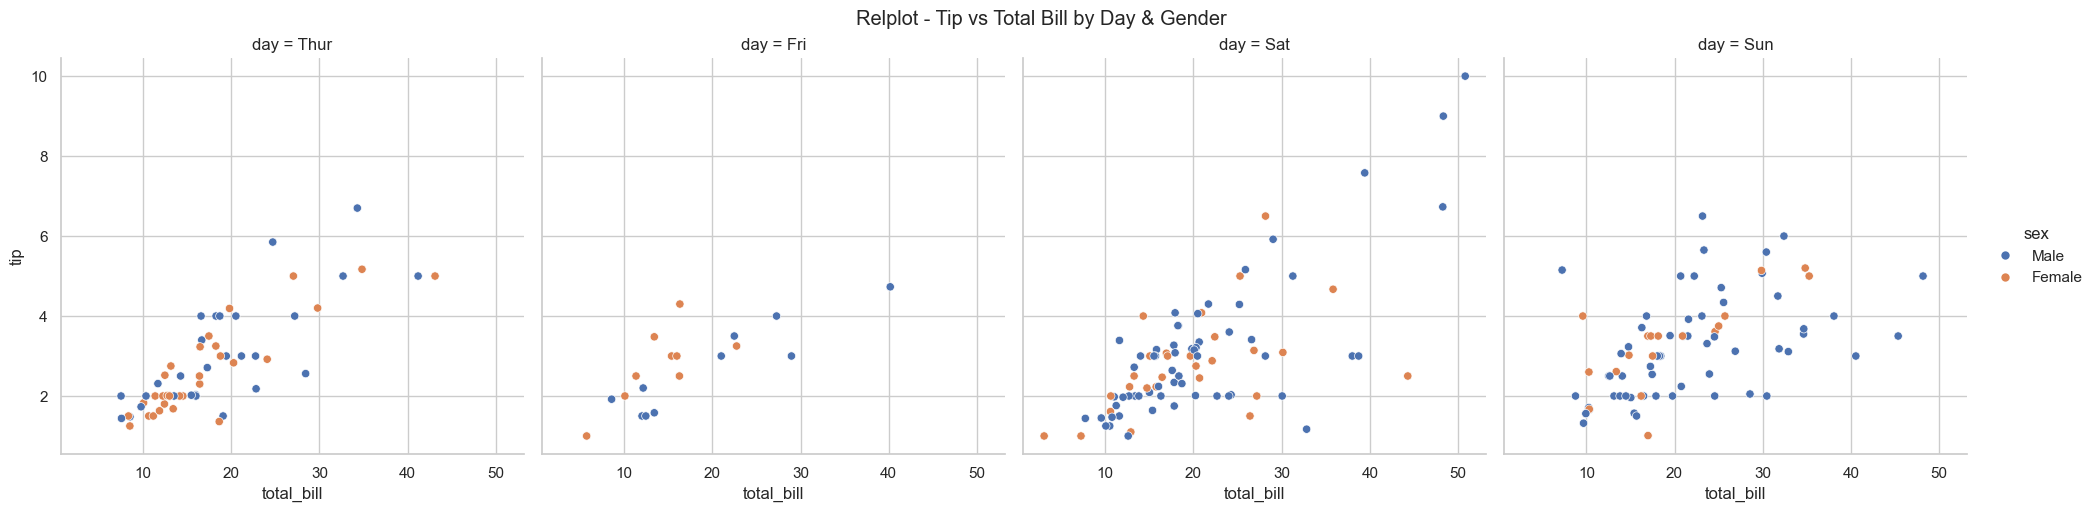

In [145]:
# Relplot with Facets
sns.relplot(x='total_bill', y='tip', hue='sex', col='day', data=tips)
plt.suptitle('Relplot - Tip vs Total Bill by Day & Gender', y=1.02)
plt.show()

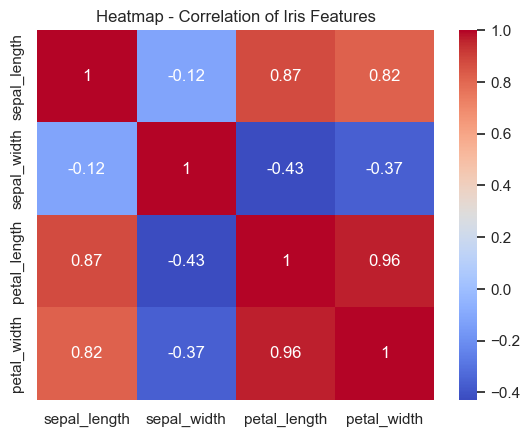

In [151]:
# Select only numeric columns
iris_num = iris.select_dtypes(include=['float', 'int'])
 
# Compute correlation
corr = iris_num.corr()
 
# Plot the heatmap
sns.heatmap(corr, annot=True,cmap='coolwarm')
plt.title("Heatmap - Correlation of Iris Features")
plt.show()

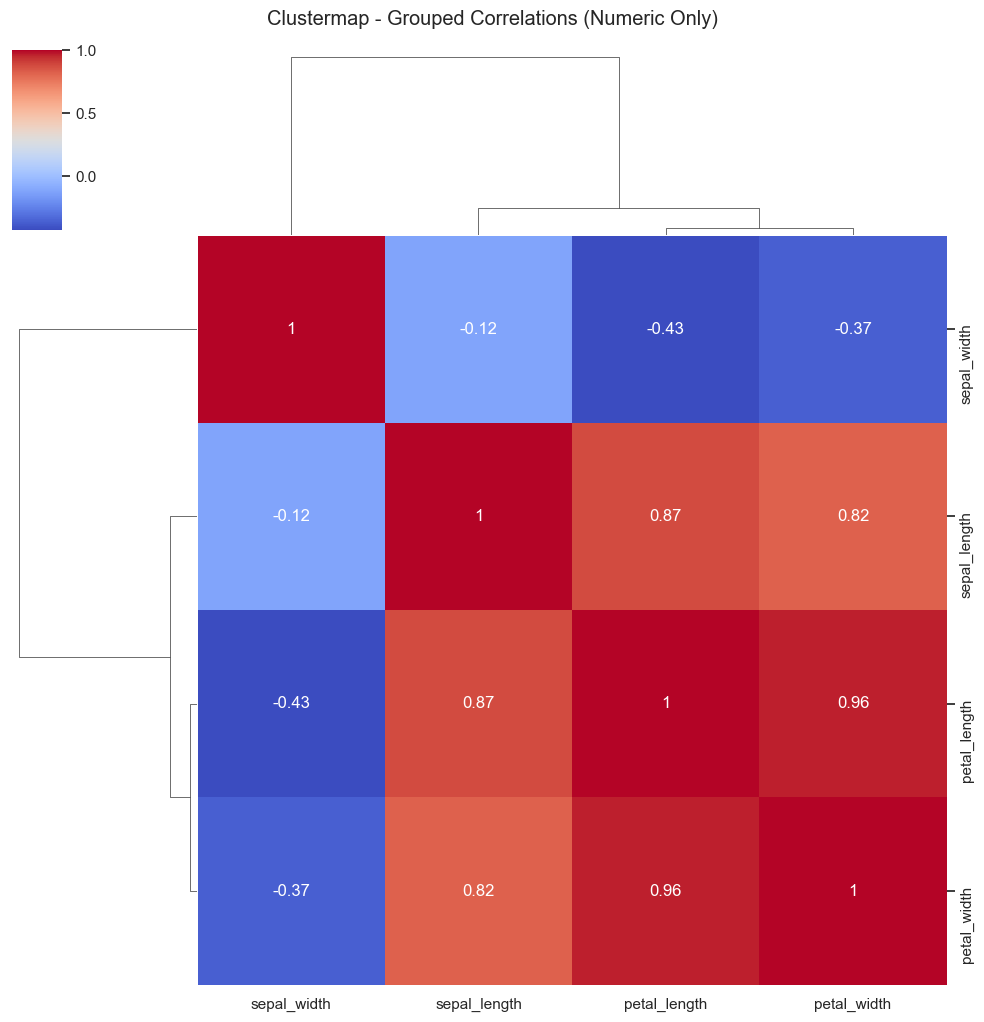

In [153]:
# Select only numeric columns (exclude 'species')
iris_num = iris.select_dtypes(include=['float', 'int'])
 
# Compute correlation matrix
corr = iris_num.corr()
 
# Create the clustermap
sns.clustermap(corr, cmap='coolwarm', annot=True)
plt.suptitle('Clustermap - Grouped Correlations (Numeric Only)', y=1.02)
plt.show()

In [11]:
import pandas as pd
df2=pd.read_csv(r"C:\coetraining\matplotlib\Customer_support_data.csv")
df2.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [13]:
print("Shape of dataset:", df2.shape)
print("\nData types:\n", df2.dtypes)
print("\nMissing values:\n", df2.isnull().sum())

Shape of dataset: (85907, 20)

Data types:
 Unique id                   object
channel_name                object
category                    object
Sub-category                object
Customer Remarks            object
Order_id                    object
order_date_time             object
Issue_reported at           object
issue_responded             object
Survey_response_Date        object
Customer_City               object
Product_category            object
Item_price                 float64
connected_handling_time    float64
Agent_name                  object
Supervisor                  object
Manager                     object
Tenure Bucket               object
Agent Shift                 object
CSAT Score                   int64
dtype: object

Missing values:
 Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time           

In [159]:
duplicates = df.duplicated().sum()
df = df.drop_duplicates()

In [15]:
df2_clean = df2.dropna()

In [17]:
df2.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [165]:
df2_clean.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
13565,08c6a929-a403-4f14-810f-2275fe591230,Outcall,Returns,Return request,Good,0258d703-8287-428d-9e48-446e29eec3e5,29/07/2023 03:44,05/08/2023 11:11,05/08/2023 11:50,05-Aug-23,BETTIAH,Electronics,899.0,367.0,Katelyn Horton,Mason Gupta,Olivia Tan,0-30,Morning,5
13603,eae37bb3-91ec-4154-ba3c-7e4a6309a946,Outcall,Returns,Return request,Not good,d5d704c1-7d8e-4573-8e9d-aec29e6d3b40,31/07/2023 20:21,04/08/2023 12:04,05/08/2023 07:02,05-Aug-23,PATNA,Electronics,899.0,604.0,Michael Ruiz,Madison Kim,John Smith,>90,Morning,2
18445,296c5c93-6a4f-4fa5-b276-3feecfeaf636,Outcall,Returns,Return request,Call was helpful.,6a318938-1b06-4394-82d7-83a0d7c18f29,29/07/2023 22:52,09/08/2023 12:40,09/08/2023 12:43,09-Aug-23,AGRA,Electronics,868.0,233.0,Dillon Miller,Mason Gupta,Olivia Tan,0-30,Morning,4
19678,5155d369-7bc3-4c40-9e26-6dcee58ace99,Outcall,Returns,Return request,Good service,feb6c5f8-5418-4abc-aec4-494ce0df2791,01/08/2023 13:35,08/08/2023 12:35,08/08/2023 12:39,08-Aug-23,Birbhum,Electronics,899.0,458.0,Dillon Miller,Mason Gupta,Olivia Tan,0-30,Morning,5
20080,ddaae943-3535-452e-857f-591d4b9ae0c8,Outcall,Cancellation,Return cancellation,Thanks,68b1ae3c-a0f9-48c7-96f0-2e17a460814c,03/08/2023 13:42,07/08/2023 13:55,08/08/2023 09:21,08-Aug-23,BAREILLY,Electronics,799.0,362.0,Patricia Cross,Mason Gupta,Olivia Tan,0-30,Afternoon,5


In [167]:
numeric_cols = df2.select_dtypes(include=['float64', 'int64']).columns
df2[numeric_cols] = df2[numeric_cols].fillna(df2[numeric_cols].mean())
print("Missing values after handling:\n", df2.isnull().sum())

Missing values after handling:
 Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                     0
connected_handling_time        0
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


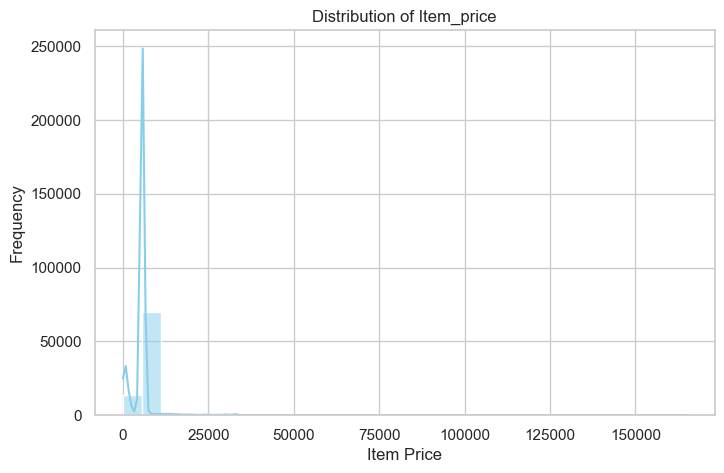

In [175]:
plt.figure(figsize=(8,5))
sns.histplot(df2['Item_price'], bins=30, color='skyblue',kde=True)
plt.title('Distribution of Item_price')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()

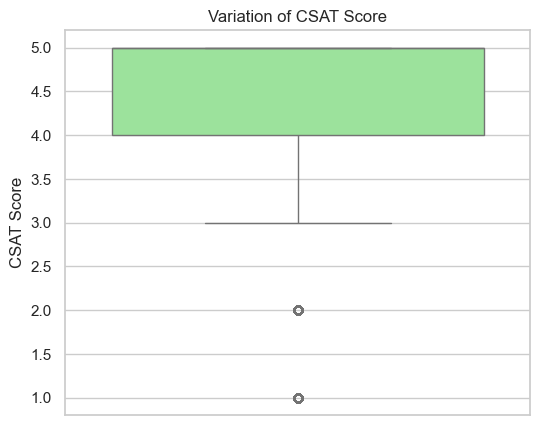

In [181]:
plt.figure(figsize=(6,5))
sns.boxplot(y=df2['CSAT Score'], color='lightgreen')
plt.title('Variation of CSAT Score')
plt.ylabel('CSAT Score')
plt.show()

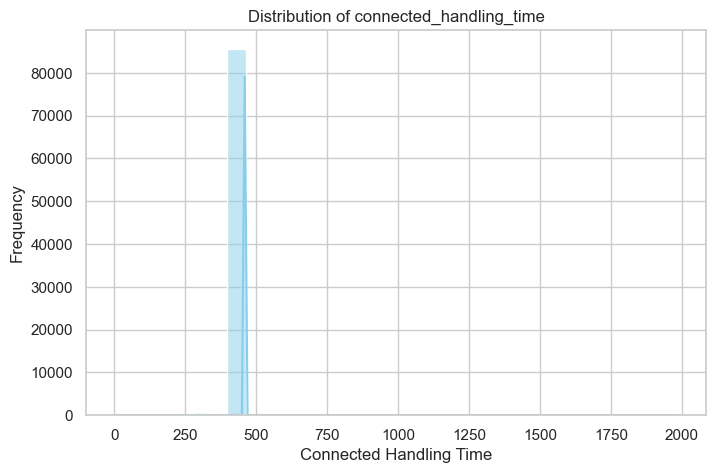

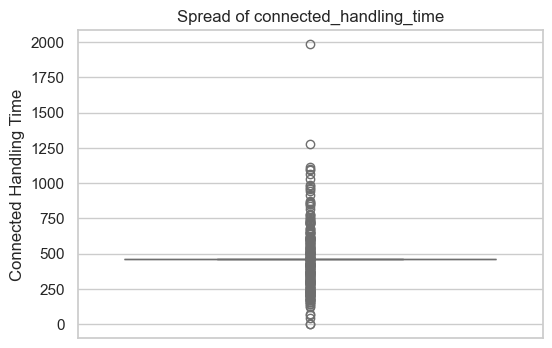

In [187]:
plt.figure(figsize=(8,5))
sns.histplot(df2['connected_handling_time'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of connected_handling_time')
plt.xlabel('Connected Handling Time')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(y=df2['connected_handling_time'].dropna(), color='lightcoral')
plt.title('Spread of connected_handling_time')
plt.ylabel('Connected Handling Time')
plt.show()

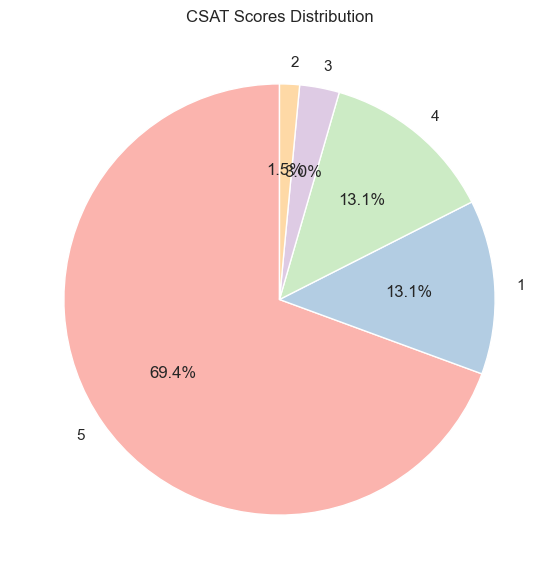

In [189]:
csat_counts = df2['CSAT Score'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(csat_counts, labels=csat_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('CSAT Scores Distribution')
plt.show()

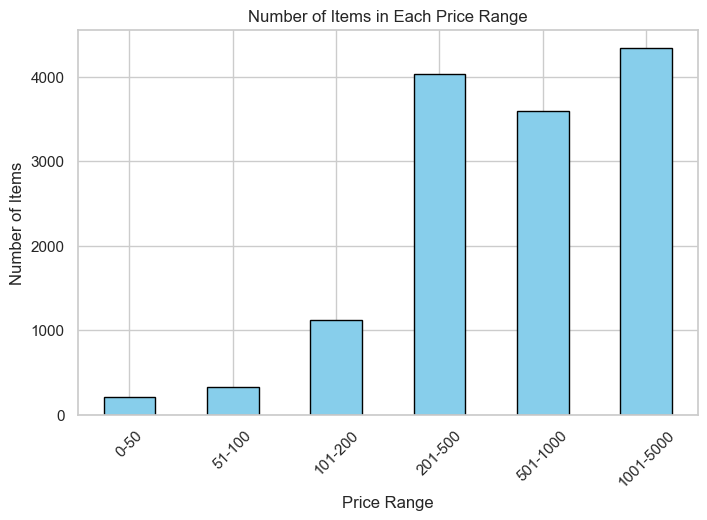

In [191]:
bins = [0, 50, 100, 200, 500, 1000, 5000]
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000']

# Bin the Item_price column
df2['Price_Range'] = pd.cut(df2['Item_price'], bins=bins, labels=labels)

# Count items in each range
price_counts = df2['Price_Range'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(8,5))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Items in Each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)
plt.show()

C:\Users\vedap\AppData\Local\Temp\ipykernel_6004\4058471759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='channel_name', order=df2['channel_name'].value_counts().index, palette='pastel')


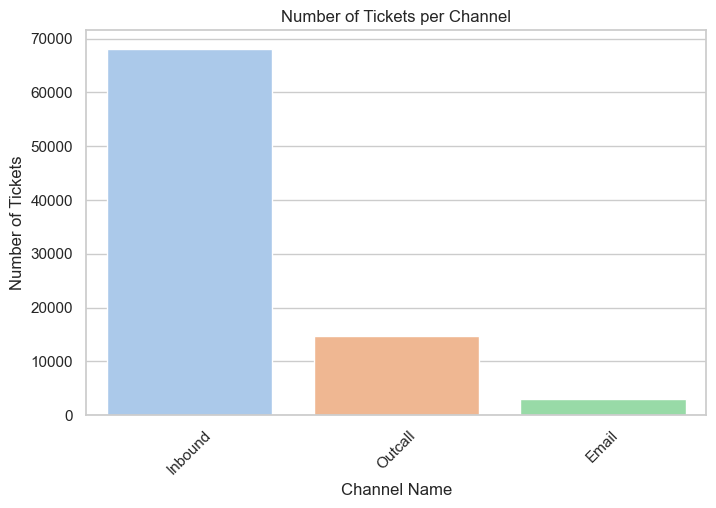

In [193]:
plt.figure(figsize=(8,5))
sns.countplot(data=df2, x='channel_name', order=df2['channel_name'].value_counts().index, palette='pastel')
plt.title('Number of Tickets per Channel')
plt.xlabel('Channel Name')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()

C:\Users\vedap\AppData\Local\Temp\ipykernel_6004\550599315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='channel_name', order=channel_order, palette='pastel')


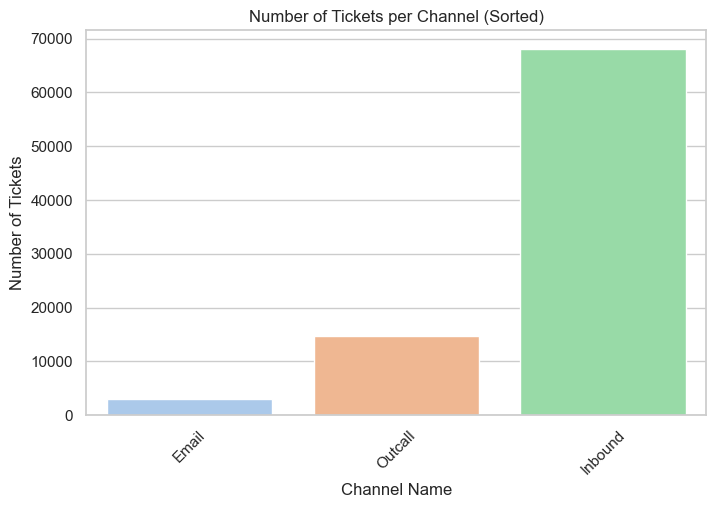

In [209]:
channel_order = df2['channel_name'].value_counts().sort_values(ascending=True).index

plt.figure(figsize=(8,5))
sns.countplot(data=df2, x='channel_name', order=channel_order, palette='pastel')
plt.title('Number of Tickets per Channel (Sorted)')
plt.xlabel('Channel Name')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()

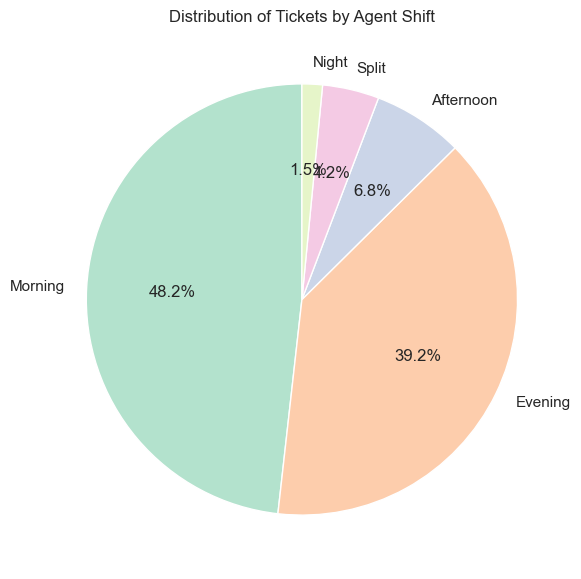

In [211]:
shift_counts = df2['Agent Shift'].value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(shift_counts, labels=shift_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
plt.title('Distribution of Tickets by Agent Shift')
plt.show()

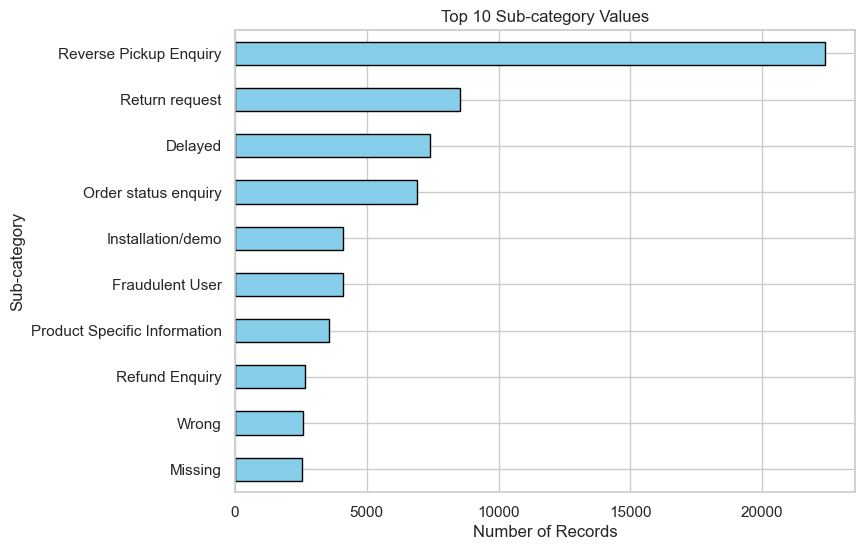

In [219]:
top10_subcat = df2['Sub-category'].value_counts().head(10)

# Plot horizontal bar chart
plt.figure(figsize=(8,6))
top10_subcat.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Sub-category Values')
plt.xlabel('Number of Records')
plt.ylabel('Sub-category')
plt.show()

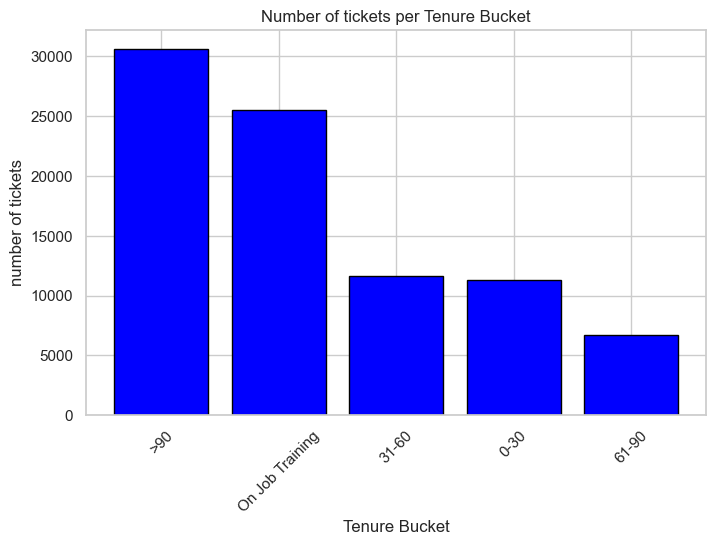

In [223]:
tenure_counts=df2['Tenure Bucket'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(tenure_counts.index,tenure_counts.values,color='blue', edgecolor='black')
plt.title('Number of tickets per Tenure Bucket')
plt.xlabel('Tenure Bucket')
plt.ylabel('number of tickets')
plt.xticks(rotation=45)
plt.show()

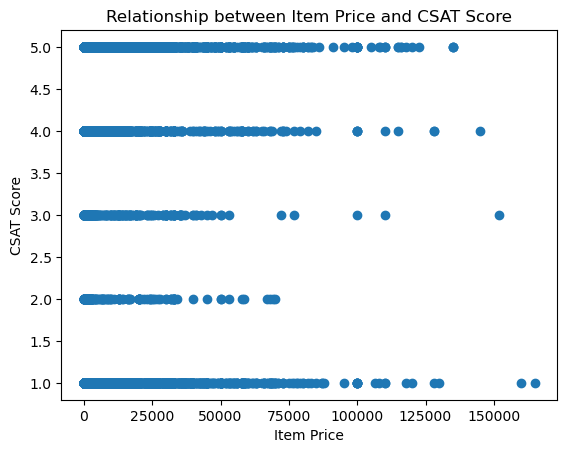

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df2['Item_price'], df2['CSAT Score'])
plt.title('Relationship between Item Price and CSAT Score')
plt.xlabel('Item Price')
plt.ylabel('CSAT Score')
plt.show()

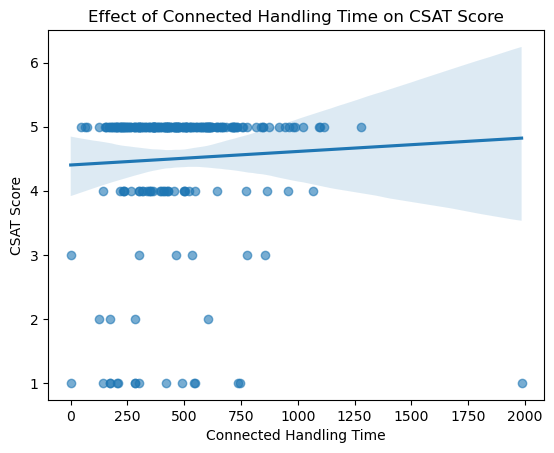

In [23]:
import seaborn as sns

sns.regplot(x='connected_handling_time', y='CSAT Score', data=df2, scatter_kws={'alpha':0.6})

plt.title('Effect of Connected Handling Time on CSAT Score')
plt.xlabel('Connected Handling Time')
plt.ylabel('CSAT Score')
plt.show()

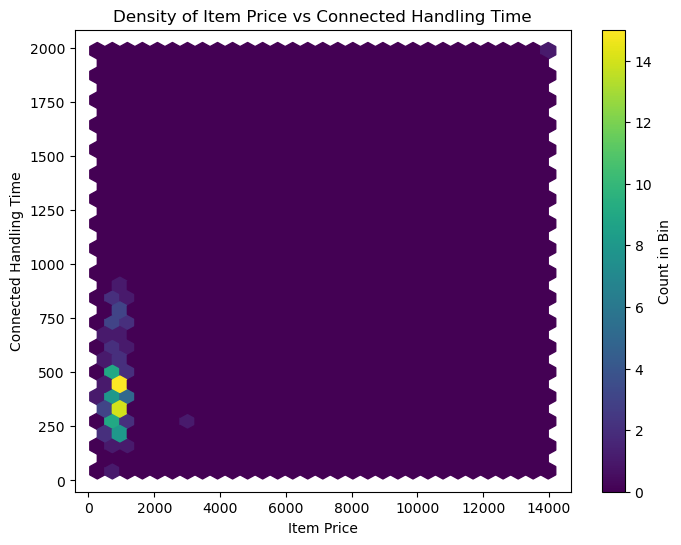

In [25]:
plt.figure(figsize=(8,6))
plt.hexbin(df2['Item_price'], df2['connected_handling_time'], gridsize=30, cmap='viridis')

plt.title('Density of Item Price vs Connected Handling Time')
plt.xlabel('Item Price')
plt.ylabel('Connected Handling Time')
plt.colorbar(label='Count in Bin')
plt.show()

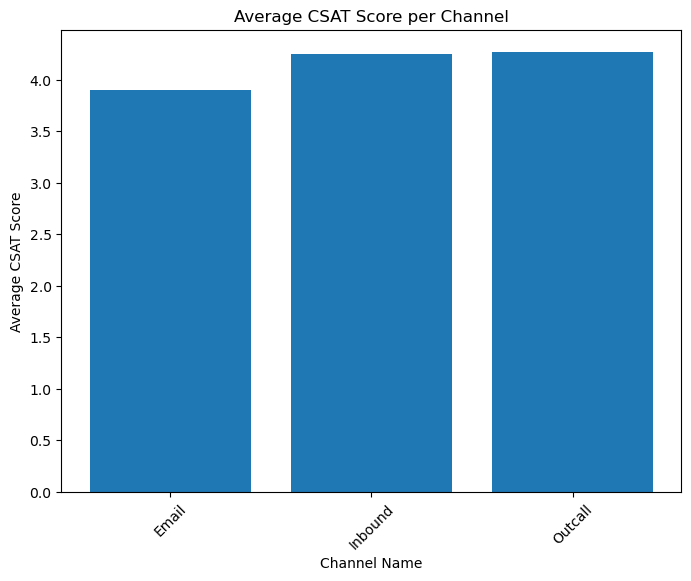

In [27]:
avg_csat = df2.groupby('channel_name')['CSAT Score'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.bar(avg_csat['channel_name'], avg_csat['CSAT Score'])
plt.title('Average CSAT Score per Channel')
plt.xlabel('Channel Name')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)
plt.show()

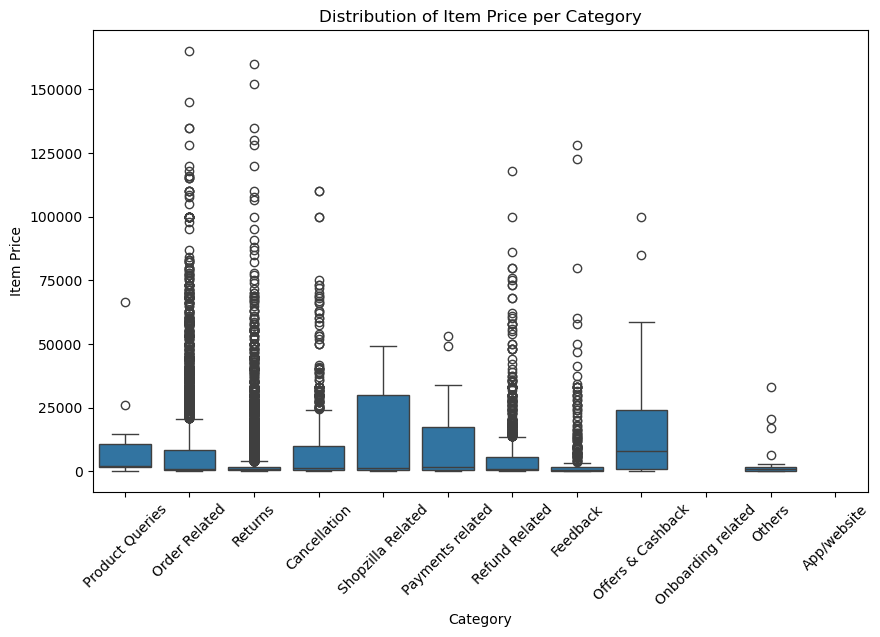

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='Item_price', data=df2)

plt.title('Distribution of Item Price per Category')
plt.xlabel('Category')
plt.ylabel('Item Price')
plt.xticks(rotation=45)
plt.show()

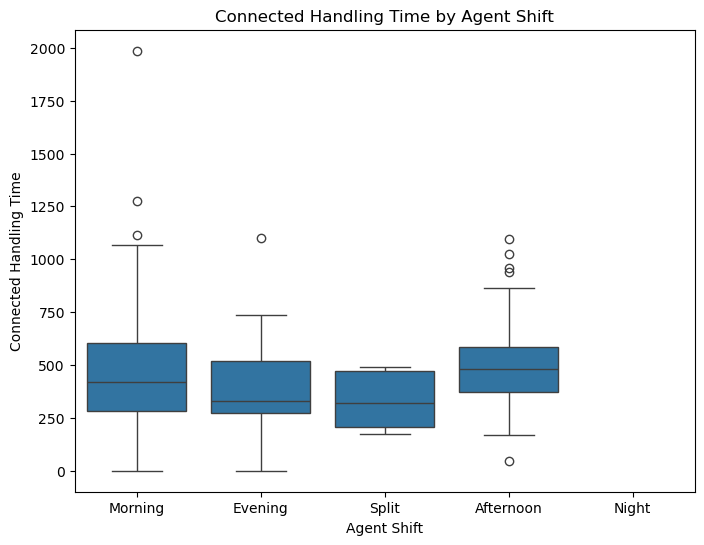

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Agent Shift', y='connected_handling_time', data=df2)

plt.title('Connected Handling Time by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Connected Handling Time')
plt.show()

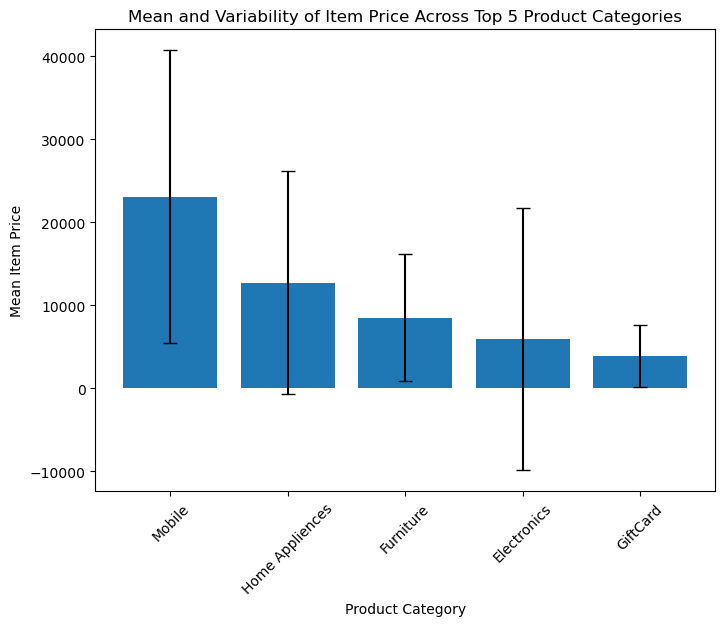

In [33]:
stats = (
    df2.groupby('Product_category')['Item_price']
      .agg(['mean', 'std', 'count'])
      .reset_index()
)

top5 = stats.sort_values('mean', ascending=False).head(5)

plt.figure(figsize=(8,6))
plt.bar(top5['Product_category'], top5['mean'], yerr=top5['std'], capsize=5)
plt.title('Mean and Variability of Item Price Across Top 5 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Mean Item Price')
plt.xticks(rotation=45)
plt.show()

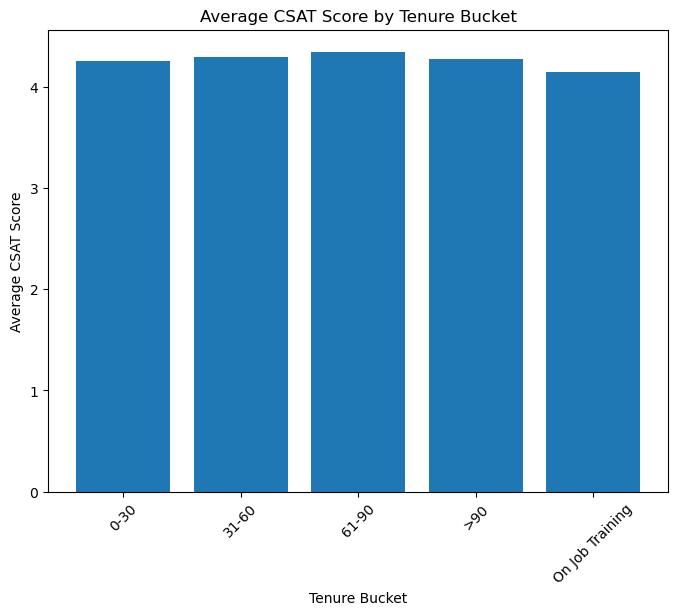

In [35]:
csat_by_tenure = df2.groupby('Tenure Bucket')['CSAT Score'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.bar(csat_by_tenure['Tenure Bucket'], csat_by_tenure['CSAT Score'])
plt.title('Average CSAT Score by Tenure Bucket')
plt.xlabel('Tenure Bucket')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)
plt.show()

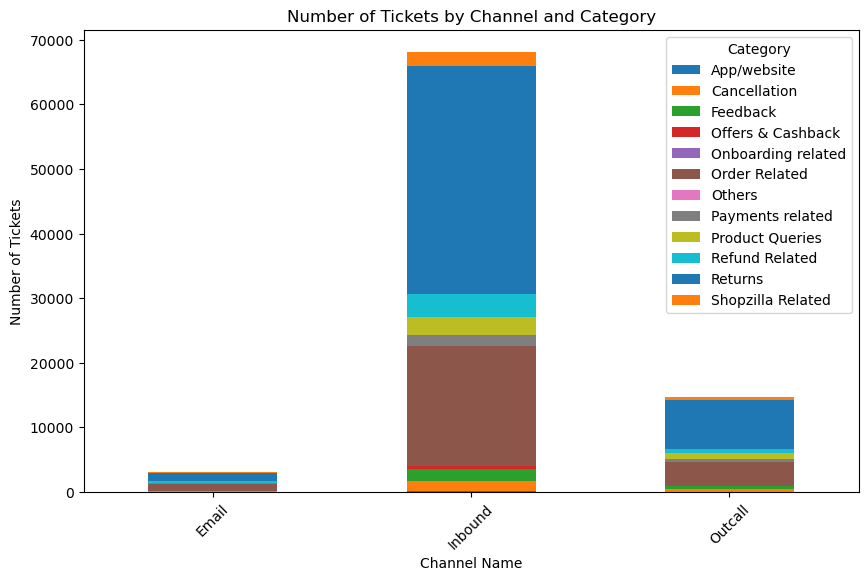

In [37]:
ticket_counts = df2.pivot_table(index='channel_name', columns='category', values='CSAT Score', aggfunc='count', fill_value=0)

ticket_counts.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Number of Tickets by Channel and Category')
plt.xlabel('Channel Name')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

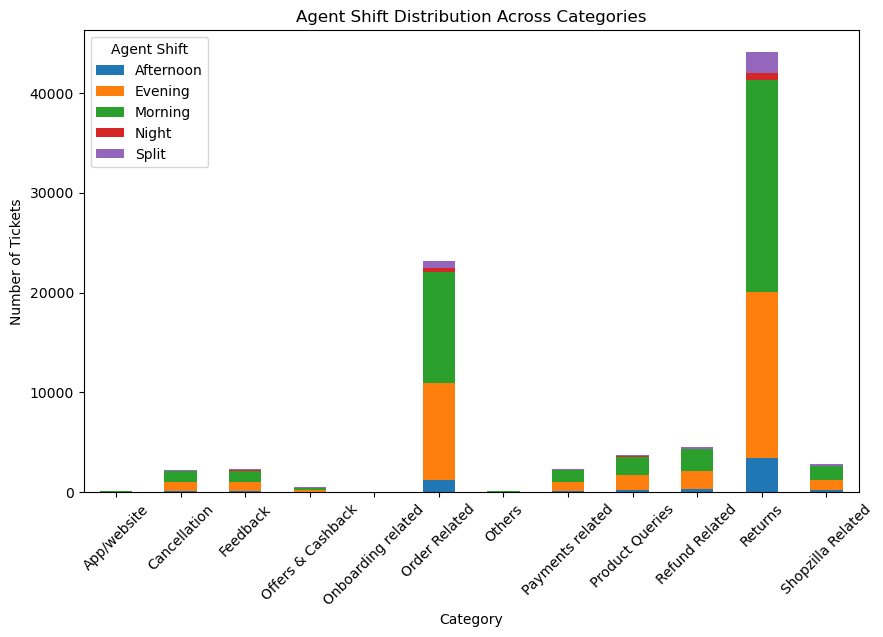

In [39]:
shift_counts = df2.pivot_table(index='category', columns='Agent Shift', values='CSAT Score', aggfunc='count', fill_value=0)

shift_counts.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Agent Shift Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.legend(title='Agent Shift')
plt.show()

C:\Users\vedap\AppData\Local\Temp\ipykernel_16144\1165388235.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Survey_response_Date'] = pd.to_datetime(df2['Survey_response_Date'], errors='coerce')


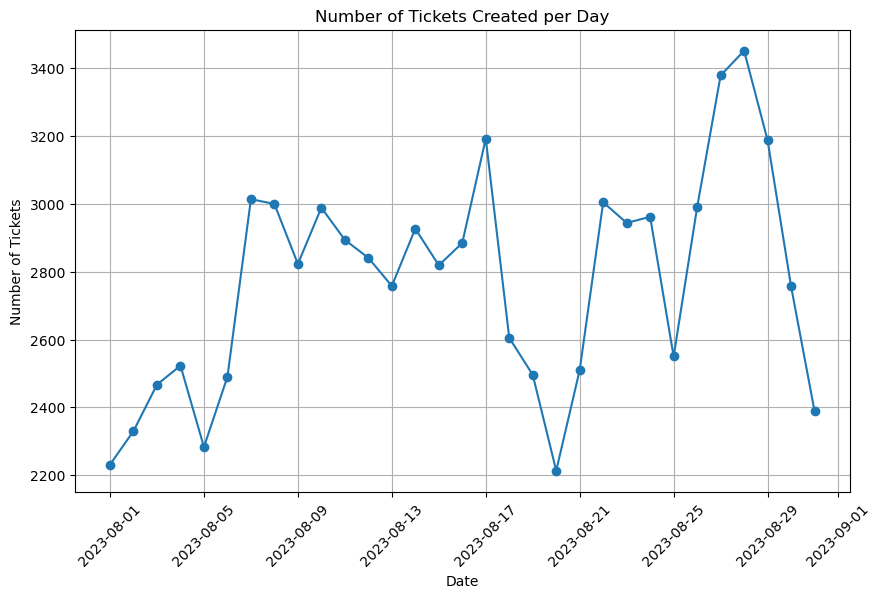

In [43]:
df2['Survey_response_Date'] = pd.to_datetime(df2['Survey_response_Date'], errors='coerce')

# Count tickets per day
tickets_per_day = df2.groupby('Survey_response_Date').size().reset_index(name='Ticket Count')

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(tickets_per_day['Survey_response_Date'], tickets_per_day['Ticket Count'], marker='o')
plt.title('Number of Tickets Created per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

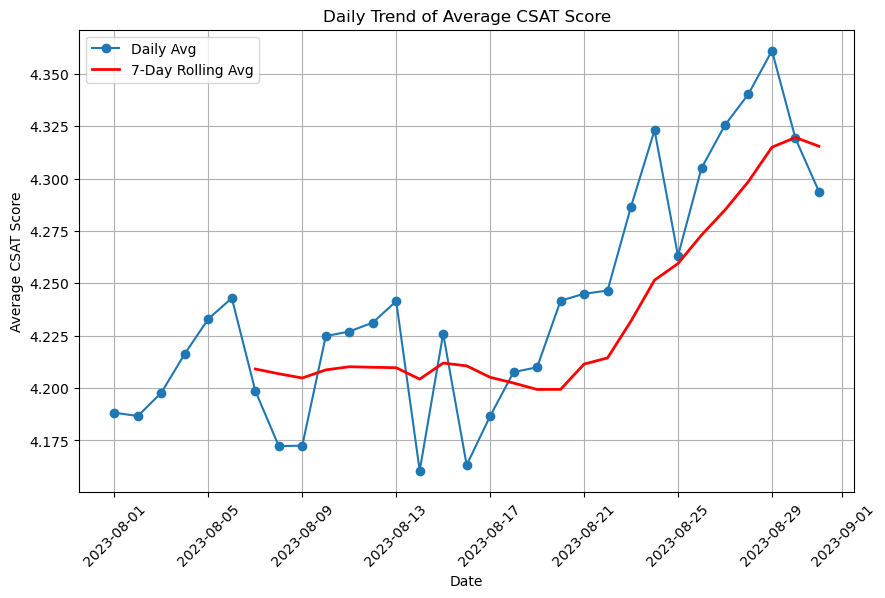

In [47]:
df2['Survey_response_Date'] = pd.to_datetime(df2['Survey_response_Date'], errors='coerce')

daily_csat = df2.groupby('Survey_response_Date')['CSAT Score'].mean().reset_index()

daily_csat['Rolling Avg'] = daily_csat['CSAT Score'].rolling(window=7).mean()


plt.figure(figsize=(10,6))
plt.plot(daily_csat['Survey_response_Date'], daily_csat['CSAT Score'], marker='o', label='Daily Avg')
plt.plot(daily_csat['Survey_response_Date'], daily_csat['Rolling Avg'], color='red', linewidth=2, label='7-Day Rolling Avg')
plt.title('Daily Trend of Average CSAT Score')
plt.xlabel('Date')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

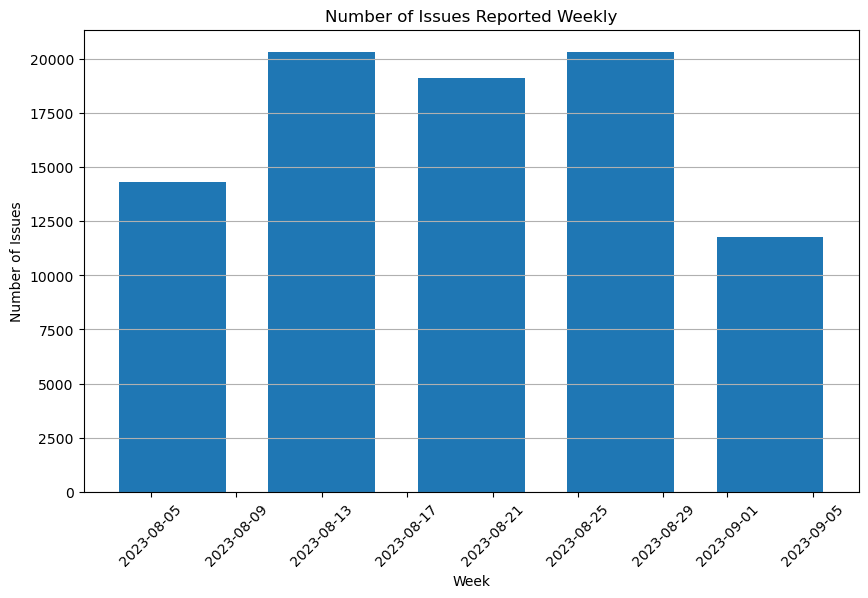

In [53]:
df2['Survey_response_Date'] = pd.to_datetime(df2['Survey_response_Date'], errors='coerce')

weekly_issues = df2.resample('W', on='Survey_response_Date').size().reset_index(name='Issue Count')

plt.figure(figsize=(10,6))
plt.bar(weekly_issues['Survey_response_Date'], weekly_issues['Issue Count'], width=5)  # width in days
plt.title('Number of Issues Reported Weekly')
plt.xlabel('Week')
plt.ylabel('Number of Issues')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

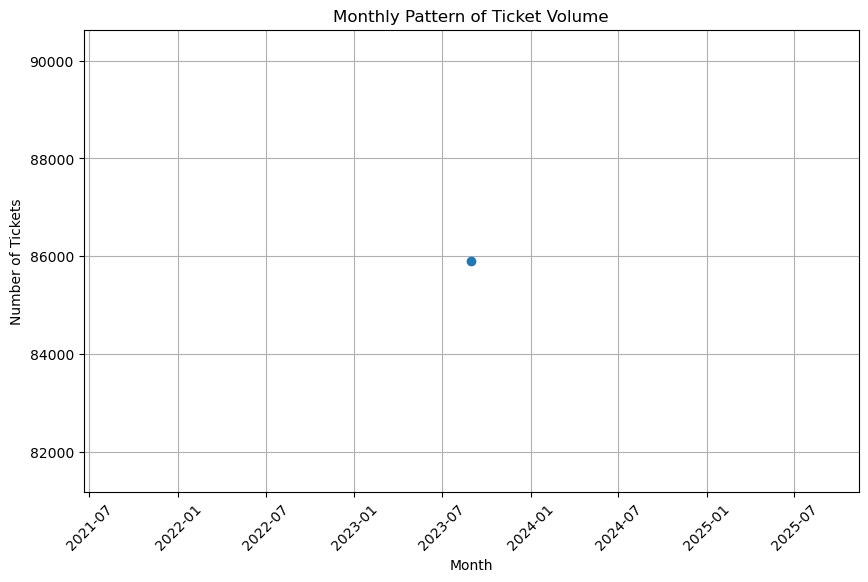

In [59]:
df2['Survey_response_Date'] = pd.to_datetime(df2['Survey_response_Date'], errors='coerce')

# Aggregate number of tickets per month
monthly_tickets = df2.resample('ME', on='Survey_response_Date').size().reset_index(name='Ticket Count')

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(monthly_tickets['Survey_response_Date'], monthly_tickets['Ticket Count'], marker='o', linestyle='-')
plt.title('Monthly Pattern of Ticket Volume')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

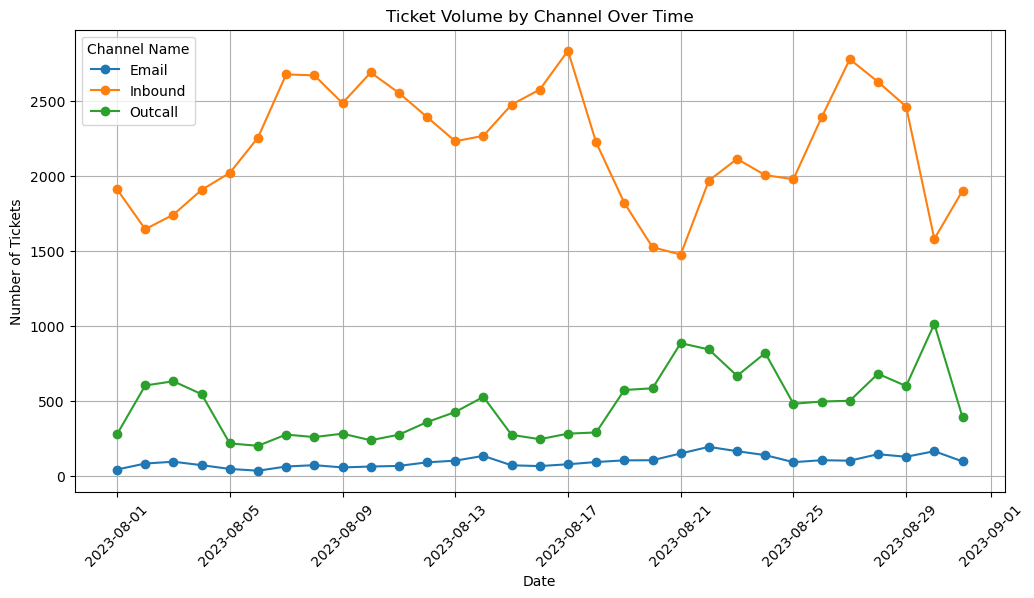

In [63]:
df2['Survey_response_Date'] = pd.to_datetime(df2['Survey_response_Date'], errors='coerce')

# Aggregate tickets per day per channel
tickets_by_channel = df2.groupby(['Survey_response_Date', 'channel_name']).size().reset_index(name='Ticket Count')

# Pivot for plotting
tickets_pivot = tickets_by_channel.pivot(index='Survey_response_Date', columns='channel_name', values='Ticket Count').fillna(0)

# Plot multi-line chart
plt.figure(figsize=(12,6))
for channel in tickets_pivot.columns:
    plt.plot(tickets_pivot.index, tickets_pivot[channel], marker='o', label=channel)

plt.title('Ticket Volume by Channel Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Channel Name')
plt.show()

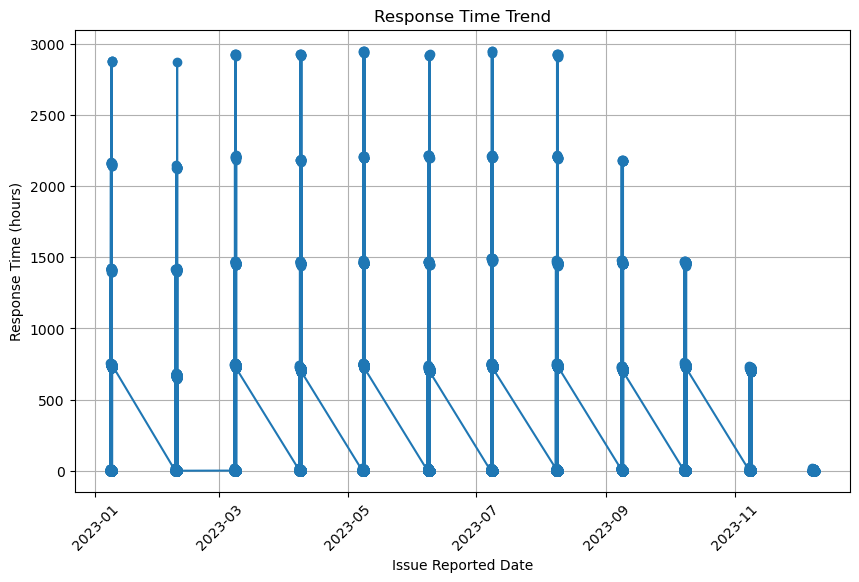

In [69]:
df2['Issue_reported at'] = pd.to_datetime(df2['Issue_reported at'], errors='coerce')
df2['issue_responded'] = pd.to_datetime(df2['issue_responded'], errors='coerce')

# Calculate response time in hours (or minutes)
df2['response_time_hours'] = (df2['issue_responded'] - df2['Issue_reported at']).dt.total_seconds() / 3600

# Sort by reported date for line plot
df_sorted = df2.sort_values('Issue_reported at')

# Line plot
plt.figure(figsize=(10,6))
plt.plot(df_sorted['Issue_reported at'], df_sorted['response_time_hours'], marker='o', linestyle='-')
plt.title('Response Time Trend')
plt.xlabel('Issue Reported Date')
plt.ylabel('Response Time (hours)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

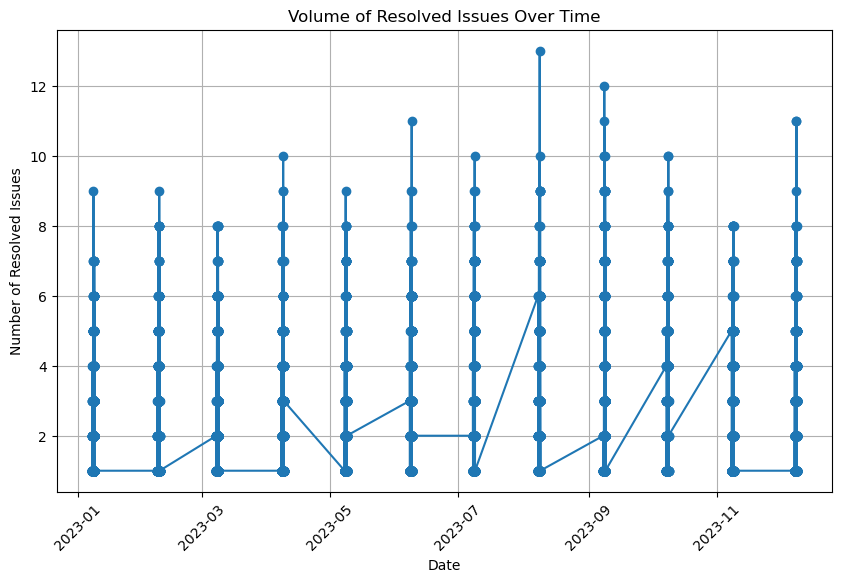

In [71]:
df2['issue_responded'] = pd.to_datetime(df2['issue_responded'], errors='coerce')

# Filter only resolved issues (assuming issue_responded not null means resolved)
resolved_issues = df2[df2['issue_responded'].notna()]

# Aggregate resolved issues per day
resolved_daily = resolved_issues.groupby('issue_responded').size().reset_index(name='Resolved Count')

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(resolved_daily['issue_responded'], resolved_daily['Resolved Count'], marker='o', linestyle='-')
plt.title('Volume of Resolved Issues Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Resolved Issues')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

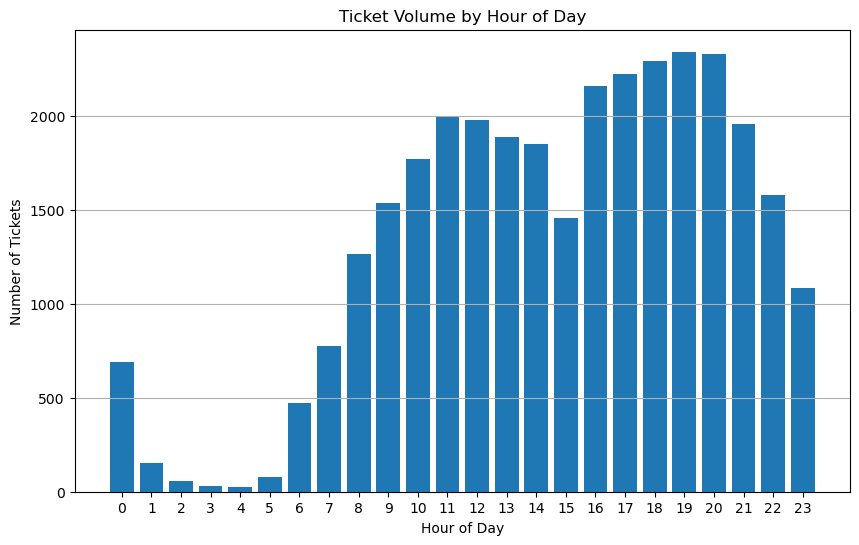

In [73]:
df2['Issue_reported at'] = pd.to_datetime(df2['Issue_reported at'], errors='coerce')

# Extract hour from reported time
df2['hour'] = df2['Issue_reported at'].dt.hour

# Count tickets per hour
hourly_counts = df2['hour'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.title('Ticket Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tickets')
plt.xticks(range(0,24))
plt.grid(axis='y')
plt.show()